In [12]:
import sys
sys.path.append('../') # Change path
from Functions import * # Import Gradient_function
import copy

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]


num_samples = 4  # Number of samples you want to generate
dim = 2
alpha = 5

# Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
mu = np.zeros(dim)
identity_matrix = np.eye(dim)
cov_matrix = identity_matrix
points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

point_number = 1 # Point you want to test
point_index = 0 # Index you want to test

In [13]:
# Function af x
sum = Loss_function_fast(points,Y,alpha)
print(sum)

# Function af x+epsilon
point_e = copy.deepcopy(points)
point_e[point_number][point_index] += 0.001 # Update the point[1][0]
sum_e = Loss_function_fast(point_e,Y,alpha)
print(sum_e)

# Gradient af x
gradient = Gradient_function(point_number,point_index,Y,points,"norm",alpha)
print(gradient)

# Error
(sum_e-sum)/0.001-(gradient)

-7.08990427511037
-7.091743805452887
-1.8377953345450462


-0.0017350079718911893

In [14]:
hist = np.zeros(1000) # Number of test
for n in range(1000):
    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points from a normal distribution
    
    sum = Loss_function_fast(points,Y,alpha) # Function af x

    point_e = copy.deepcopy(points)
    point_e[point_number][point_index] += 0.001 # Update the point[1][0]
    sum_e = Loss_function_fast(point_e,Y,alpha) # Function af x+epsilon
    
    gradient = Gradient_function(point_number,point_index,Y,points,"norm",alpha) # Gradient af x
            
    hist[n] = (sum_e-sum)/0.001-(gradient) # Error

(array([  2.,   0.,   1.,   4.,   4.,   7.,   5.,   9.,  10.,   8.,  10.,
         10.,  19.,  21.,  20.,  25.,  35.,  41.,  35.,  42.,  58.,  68.,
         50.,  48.,  88.,  92.,  55.,  53.,  58., 122.]),
 array([-5.42012470e-03, -5.17360739e-03, -4.92709008e-03, -4.68057277e-03,
        -4.43405546e-03, -4.18753815e-03, -3.94102084e-03, -3.69450353e-03,
        -3.44798622e-03, -3.20146891e-03, -2.95495160e-03, -2.70843429e-03,
        -2.46191699e-03, -2.21539968e-03, -1.96888237e-03, -1.72236506e-03,
        -1.47584775e-03, -1.22933044e-03, -9.82813130e-04, -7.36295821e-04,
        -4.89778512e-04, -2.43261203e-04,  3.25610654e-06,  2.49773416e-04,
         4.96290725e-04,  7.42808034e-04,  9.89325343e-04,  1.23584265e-03,
         1.48235996e-03,  1.72887727e-03,  1.97539458e-03]),
 <BarContainer object of 30 artists>)

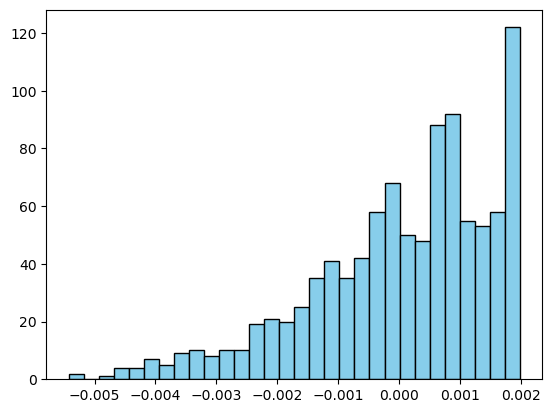

In [15]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')